In [1]:
#generic import and constant definition list
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import h5py
import astropy.constants as cons
from matplotlib.colors import LogNorm
import astropy.units as u
import pandas as pd
import scipy.optimize as opt
#all of the important fundamental constants are put into cgs units just for convenience
c=cons.c.cgs.value
G=cons.G.cgs.value
h=cons.h.cgs.value
hbar=cons.hbar.cgs.value
Msun=cons.M_sun.cgs.value
Rsun=cons.R_sun.cgs.value
Rearth=cons.R_earth.cgs.value
mp=cons.m_p.cgs.value
me=cons.m_e.cgs.value
mn=cons.m_n.cgs.value
kB=cons.k_B.cgs.value
mu_e=2 #mean mass per electron for He-core or C/O core composition
m_u = 1/cons.N_A.cgs.value #atomic mass unit in grams
from astropy.io import fits

In [3]:
data = pd.read_csv('planck_data_altered.txt',header=None,delimiter=',',names=['l','lmin','lmax', 'D(l)','D(l)_err'])
print(data.head())

     l  lmin  lmax     D(l)  D(l)_err
0   47    32    62  1407.61     51.47
1   78    63    93  2016.71     60.07
2  109    94   124  3027.82     73.29
3  140   125   155  3893.83     87.35
4  171   156   186  4867.41     97.94


In [56]:
model1data = pd.read_csv('changeBaryonNCMB.txt',delim_whitespace=True,header=None,names=['l','cl','random1','random2','random3','random4'])
print(model1data.head())

   l       cl   random1  random2    random3  random4
0  2  1265.37  0.060934  3.95935  1230900.0  35065.9
1  3  1188.27  0.100666  4.95616  1895300.0  41893.7
2  4  1113.31  0.114685  5.09980  2484260.0  45118.4
3  5  1054.85  0.103237  4.74536  3004210.0  46421.8
4  6  1012.43  0.077431  4.14502  3463240.0  46680.0


In [59]:
model2data = pd.read_csv('changeBaryonNCMBNk.txt',delim_whitespace=True,header=None,names=['l','cl','random1','random2','random3','random4','random5','random6','random7','random8'])
print(model2data.head())

   l       cl   random1   random2   random3   random4       random5   random6  \
0  2  2879.08 -0.775269  0.003991 -0.775269  0.003954 -1.745700e-07  0.003991   
1  3  2556.67 -1.738680  0.004045 -1.738680  0.014388 -1.370930e-06  0.004045   
2  4  2270.63 -1.767000  0.003992 -1.767000  0.027721 -2.120120e-06  0.003992   
3  5  2054.72 -1.154700  0.003905 -1.154700  0.039224 -2.361990e-06  0.003905   
4  6  1895.45 -0.206992  0.003806 -0.206992  0.046195 -2.096580e-06  0.003806   

        random7       random8  
0 -1.745700e-07  1.344580e-08  
1 -1.370930e-06  1.615560e-08  
2 -2.120120e-06  1.821960e-08  
3 -2.361990e-06  1.993250e-08  
4 -2.096580e-06  2.136140e-08  


In [62]:
model3data = pd.read_csv('model3.txt',delim_whitespace=True,header=None,names=['l','cl','random1','random2','random3','random4'])
print(model3data.head())

   l       cl   random1  random2    random3  random4
0  2  974.695  0.037216  3.69931  1584850.0  14983.6
1  3  960.999  0.072236  4.69053  2452450.0  19880.7
2  4  935.597  0.098440  5.03473  3227740.0  22740.9
3  5  912.635  0.108231  4.94036  3920100.0  24432.9
4  6  894.585  0.101631  4.58372  4540100.0  25418.9


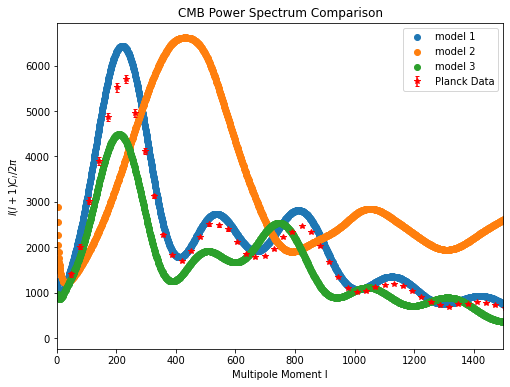

In [67]:
fig,ax=plt.subplots(figsize=(8,6))
plt.errorbar(data['l'], data['D(l)'], yerr=data['D(l)_err'], fmt='r*',markersize=6, ecolor='r', capsize=2, label='Planck Data')
plt.scatter(model1data['l'],model1data['cl'],label='model 1')
plt.scatter(model2data['l'],model2data['cl'],label='model 2')
plt.scatter(model3data['l'],model3data['cl'],label='model 3')
plt.xlim(0,1500)
plt.title('CMB Power Spectrum Comparison')
plt.xlabel('Multipole Moment l')
plt.ylabel(r'$l(l+1)C_l/2\pi$')
plt.legend()
plt.show()